<a href="https://colab.research.google.com/github/kubra-bulut/Pusula_Kubra_Bulut/blob/main/DataScienceCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA SCIENCE INTERN CASE STUDY**

***Exploratory Data Analysis (EDA)***


Emporting the libraries.

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import missingno as msno

Reading our data file with read_excel() function. Naming the data frame as df.



In [132]:
df = pd.read_excel('/content/side_effect_data 1.xlsx', sheet_name='Sheet1', header=0)

We can use the head() function to only show the top 5 rows. We can have a look to the data.

In [102]:
df.head()

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.0,181.0
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.0
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0


We can use the tail() function to only show the last 5 rows.

In [103]:
df.tail()

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
2352,9,NaN,1957-01-04,Turkiye,NaN,"desoximetasone spray, non-aerosol",2022-01-13,2022-03-04,Ishal,2022-02-12 19:13:43,Ispanakgiller,NaN,,"Astim, Guatr",,"KOAH, Kan Hastaliklari",NaN,50.0,152.0
2353,101,Female,2004-11-09,Turkiye,Mersin,olanzapine-fluoxetine,2022-01-02,2022-03-05,Agizda Farkli Bir Tat,2022-02-19 17:39:48,Istiridye,NaN,"Hipertansiyon, Astim","Astim, Kemik Erimesi","KOAH, Kan Hastaliklari","Astim, Diyabet",AB RH-,NaN,178.0
2354,127,Female,1951-11-29,Turkiye,Mersin,trazodone,2022-01-02,2022-03-12,Yorgunluk,2022-02-03 20:48:17,Deniz Urunler,"Guatr, KOAH","Alzheimer, Diger",NaN,"Astim, Diyabet","Kalp Hastaliklari, Diger",B RH+,90.0,203.0
2355,178,Male,1980-01-30,Turkiye,Kayseri,duloxetine hydrochloride,2022-01-02,2022-03-08,Carpinti,2022-02-04 05:29:20,Sari Kantaron,"Alzheimer, Diger",NaN,"Kalp Hastaliklari, Diger","Kanser, KOAH","Astim, KOAH",NaN,90.0,184.0
2356,174,Female,1986-11-07,Turkiye,Istanbul,valproic acid,2022-01-06,2022-03-06,Istah Artisi,2022-02-17 07:08:01,NaN,"Alzheimer, Diger","Kanser, Diger","Hipertansiyon, Kan Hastaliklari",,"Hipertansiyon, Diger",AB RH+,79.0,175.0


We can use the info() function to list the data types and total non-null row number within our data set.

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          1579 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2130 non-null   object        
 5   Ilac_Adi                          2357 non-null   object        
 6   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 7   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 8   Yan_Etki                          2357 non-null   object        
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 10  Alerjilerim                       1873 non-null 

We can display the columns quantity and names.

In [105]:
print('The dataset has {} rows and {} columns'.format(df.shape[0], df.shape[1]))
print(df.columns)

The dataset has 2357 rows and 19 columns
Index(['Kullanici_id', 'Cinsiyet', 'Dogum_Tarihi', 'Uyruk', 'Il', 'Ilac_Adi',
       'Ilac_Baslangic_Tarihi', 'Ilac_Bitis_Tarihi', 'Yan_Etki',
       'Yan_Etki_Bildirim_Tarihi', 'Alerjilerim', 'Kronik Hastaliklarim',
       'Baba Kronik Hastaliklari', 'Anne Kronik Hastaliklari',
       'Kiz Kardes Kronik Hastaliklari', 'Erkek Kardes Kronik Hastaliklari',
       'Kan Grubu', 'Kilo', 'Boy'],
      dtype='object')


The total number of missing values

In [86]:
print("There are {} missing values in this dataset".format(df.isnull().sum().sum()))

There are 3226 missing values in this dataset


We can look at the columns total missing values.

In [87]:
print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

Number of missing values:
	Kullanici_id: 0
	Cinsiyet: 778
	Dogum_Tarihi: 0
	Uyruk: 0
	Il: 227
	Ilac_Adi: 0
	Ilac_Baslangic_Tarihi: 0
	Ilac_Bitis_Tarihi: 0
	Yan_Etki: 0
	Yan_Etki_Bildirim_Tarihi: 0
	Alerjilerim: 484
	Kronik Hastaliklarim: 392
	Baba Kronik Hastaliklari: 156
	Anne Kronik Hastaliklari: 217
	Kiz Kardes Kronik Hastaliklari: 97
	Erkek Kardes Kronik Hastaliklari: 121
	Kan Grubu: 347
	Kilo: 293
	Boy: 114


With shape func we can see the number of columns and rows.

In [88]:
df.shape

(2357, 19)

In [89]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Kullanici_id,2357.0,97.216801,1.0,47.0,97.0,146.0,196.0,57.0172
Dogum_Tarihi,2357,1974-11-25 04:06:12.677131936,1939-10-12 00:00:00,1959-02-05 00:00:00,1973-09-09 00:00:00,1992-03-24 00:00:00,2011-04-25 00:00:00,NaN
Ilac_Baslangic_Tarihi,2357,2022-01-07 10:47:36.173101312,2022-01-01 00:00:00,2022-01-04 00:00:00,2022-01-07 00:00:00,2022-01-11 00:00:00,2022-01-14 00:00:00,NaN
Ilac_Bitis_Tarihi,2357,2022-03-10 16:25:27.365294848,2022-03-02 00:00:00,2022-03-06 00:00:00,2022-03-11 00:00:00,2022-03-15 00:00:00,2022-03-19 00:00:00,NaN
Yan_Etki_Bildirim_Tarihi,2357,2022-02-10 17:09:30.742044928,2022-02-01 04:34:33,2022-02-04 05:29:20,2022-02-09 20:53:54,2022-02-17 07:08:01,2022-02-19 21:47:39,NaN
Kilo,2064.0,80.863857,50.0,65.0,83.0,96.0,110.0,18.635269
Boy,2243.0,174.638431,145.0,160.0,176.0,187.0,203.0,16.516552


In [90]:
df.columns

Index(['Kullanici_id', 'Cinsiyet', 'Dogum_Tarihi', 'Uyruk', 'Il', 'Ilac_Adi',
       'Ilac_Baslangic_Tarihi', 'Ilac_Bitis_Tarihi', 'Yan_Etki',
       'Yan_Etki_Bildirim_Tarihi', 'Alerjilerim', 'Kronik Hastaliklarim',
       'Baba Kronik Hastaliklari', 'Anne Kronik Hastaliklari',
       'Kiz Kardes Kronik Hastaliklari', 'Erkek Kardes Kronik Hastaliklari',
       'Kan Grubu', 'Kilo', 'Boy'],
      dtype='object')

We have some messy column names in our data frame. We can change these column names with rename() function.

In [133]:
df.rename(columns={'Kronik Hastaliklarim': 'Kronik_Hastaliklarim', 'Baba Kronik Hastaliklari': 'Baba_Kronik_Hastaliklari', 'Anne Kronik Hastaliklari':'Anne_Kronik_Hastaliklari',
                   'Kiz Kardes Kronik Hastaliklari':'Kiz_Kardes_Kronik_Hastaliklari', 'Erkek Kardes Kronik Hastaliklari':'Erkek_Kardes_Kronik_Hastaliklari', 'Kan Grubu':'Kan_Grubu'}, inplace=True)

we can observe the variations in each plot. The plots are in matrix format where the row name represents x axis and column name represents the y axis.

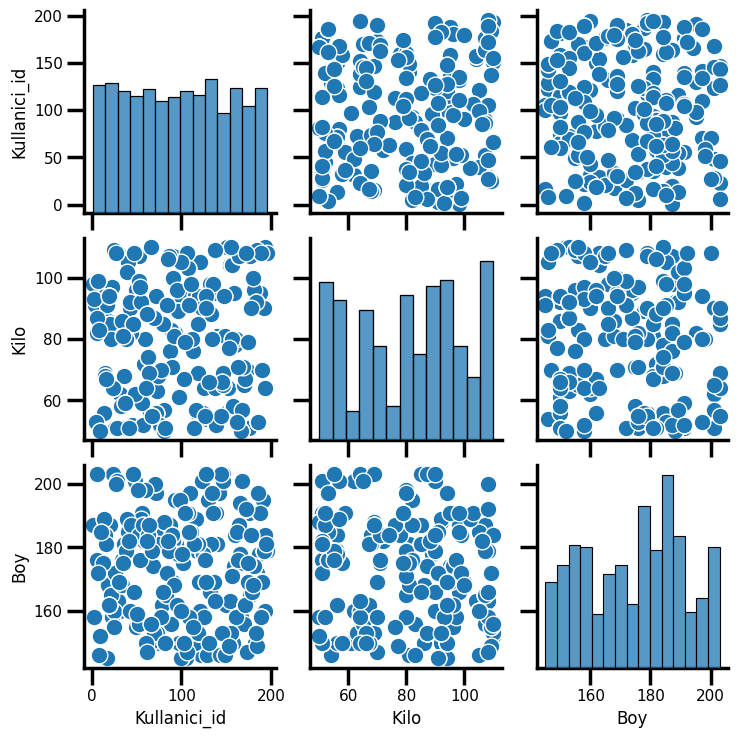

In [113]:
sns.pairplot(df)

,0
Kullanici_id,0
Cinsiyet,778
Dogum_Tarihi,0
Uyruk,0
Il,227
Ilac_Adi,0
Ilac_Baslangic_Tarihi,0
Ilac_Bitis_Tarihi,0
Yan_Etki,0
Yan_Etki_Bildirim_Tarihi,0


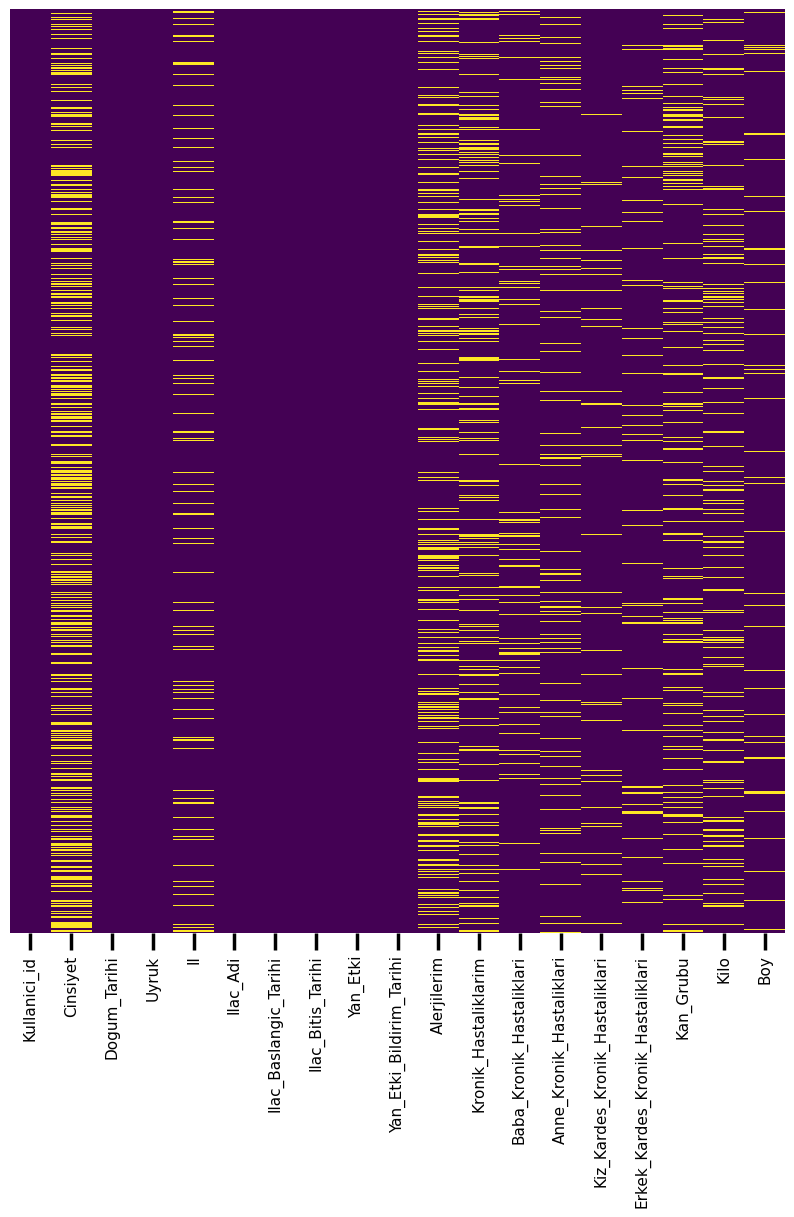

In [93]:
plt.figure(figsize=(10,12))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
df.isnull().sum()

In [17]:
!pip install missingno

The missingno library is a Python package used to visualize missing (null) data in datasets.

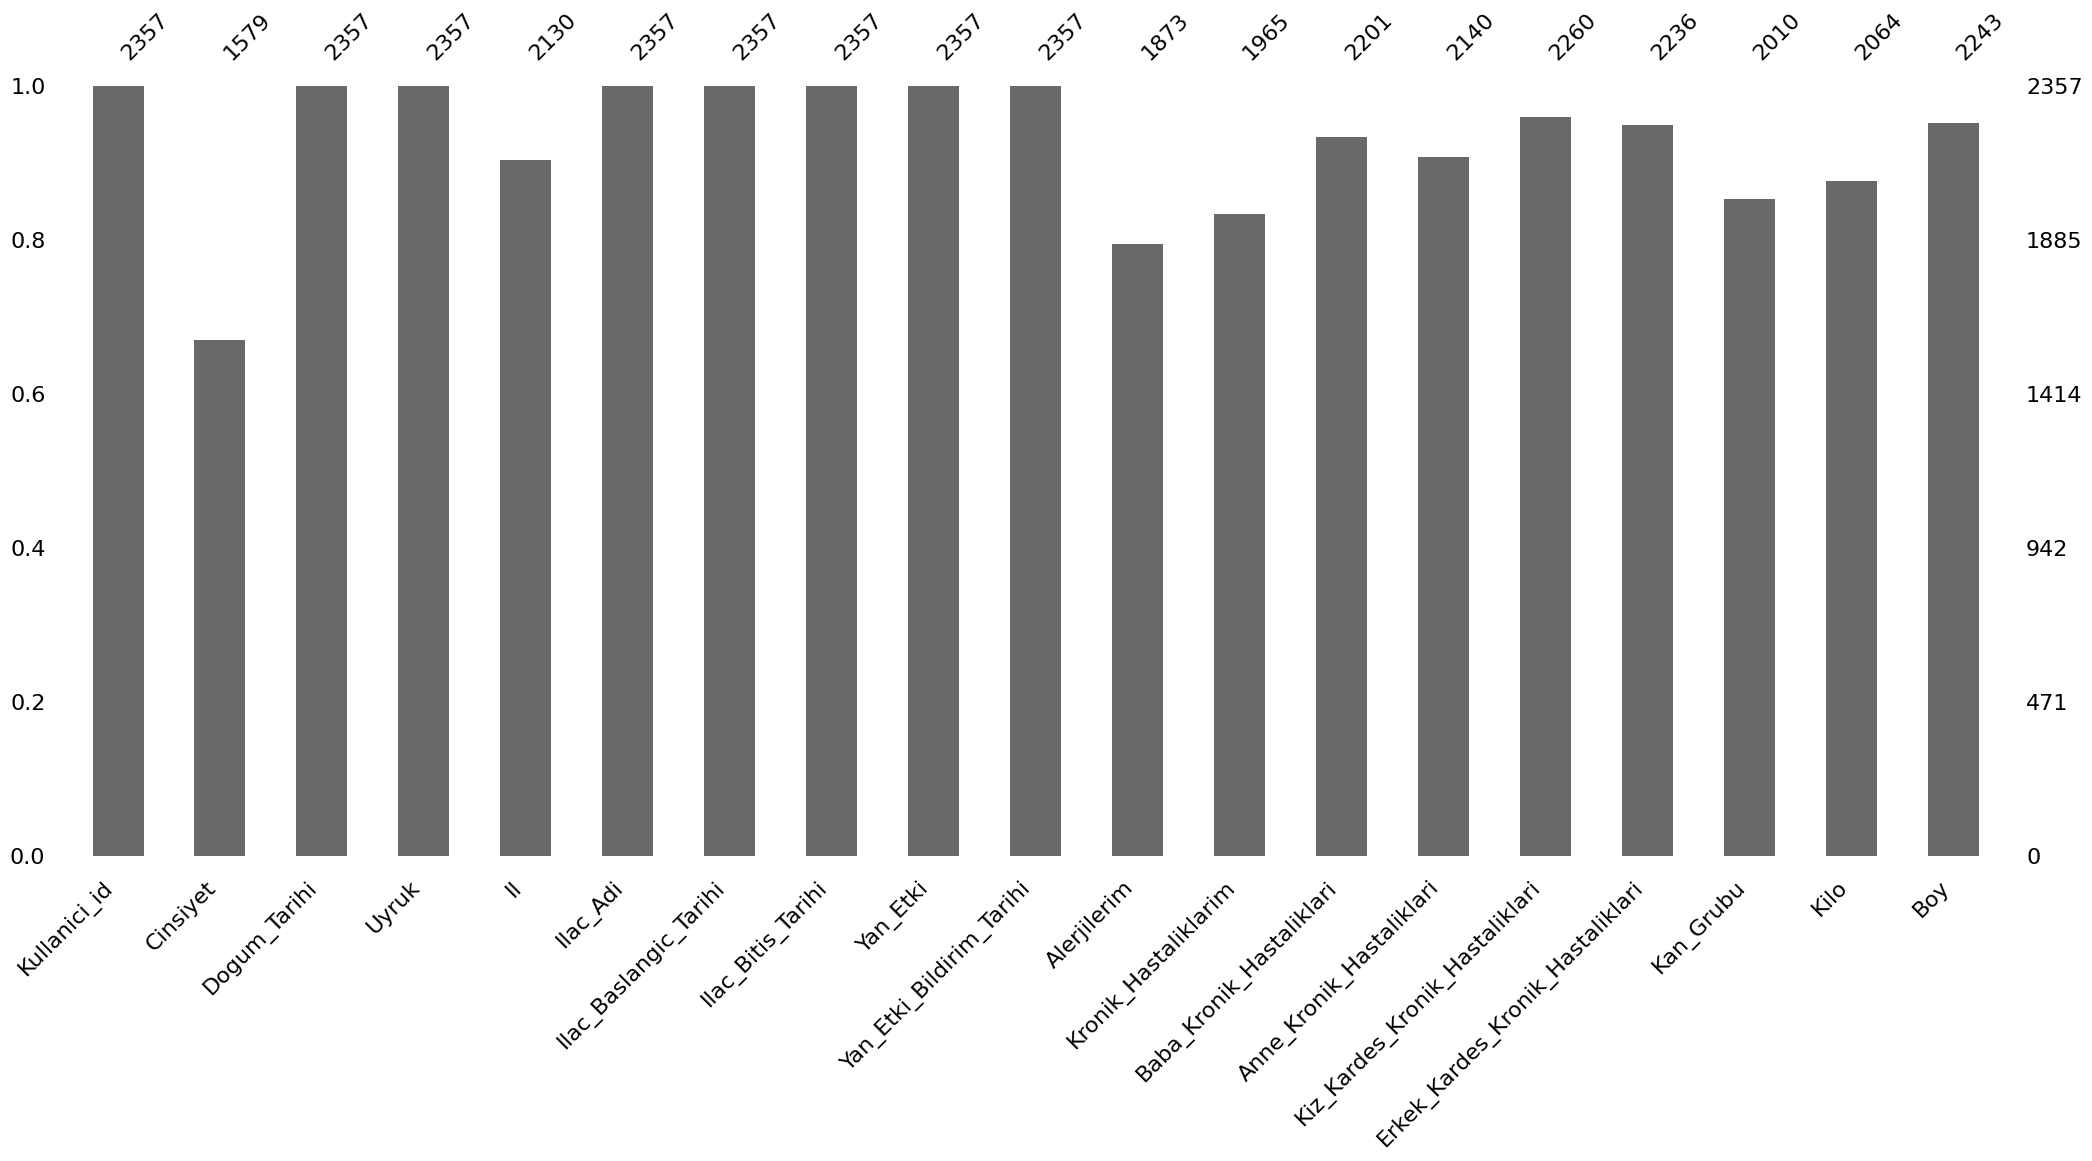

In [94]:
msno.bar(df);

Text(0.5, 1.0, 'Target distribution on Yan_Etki')

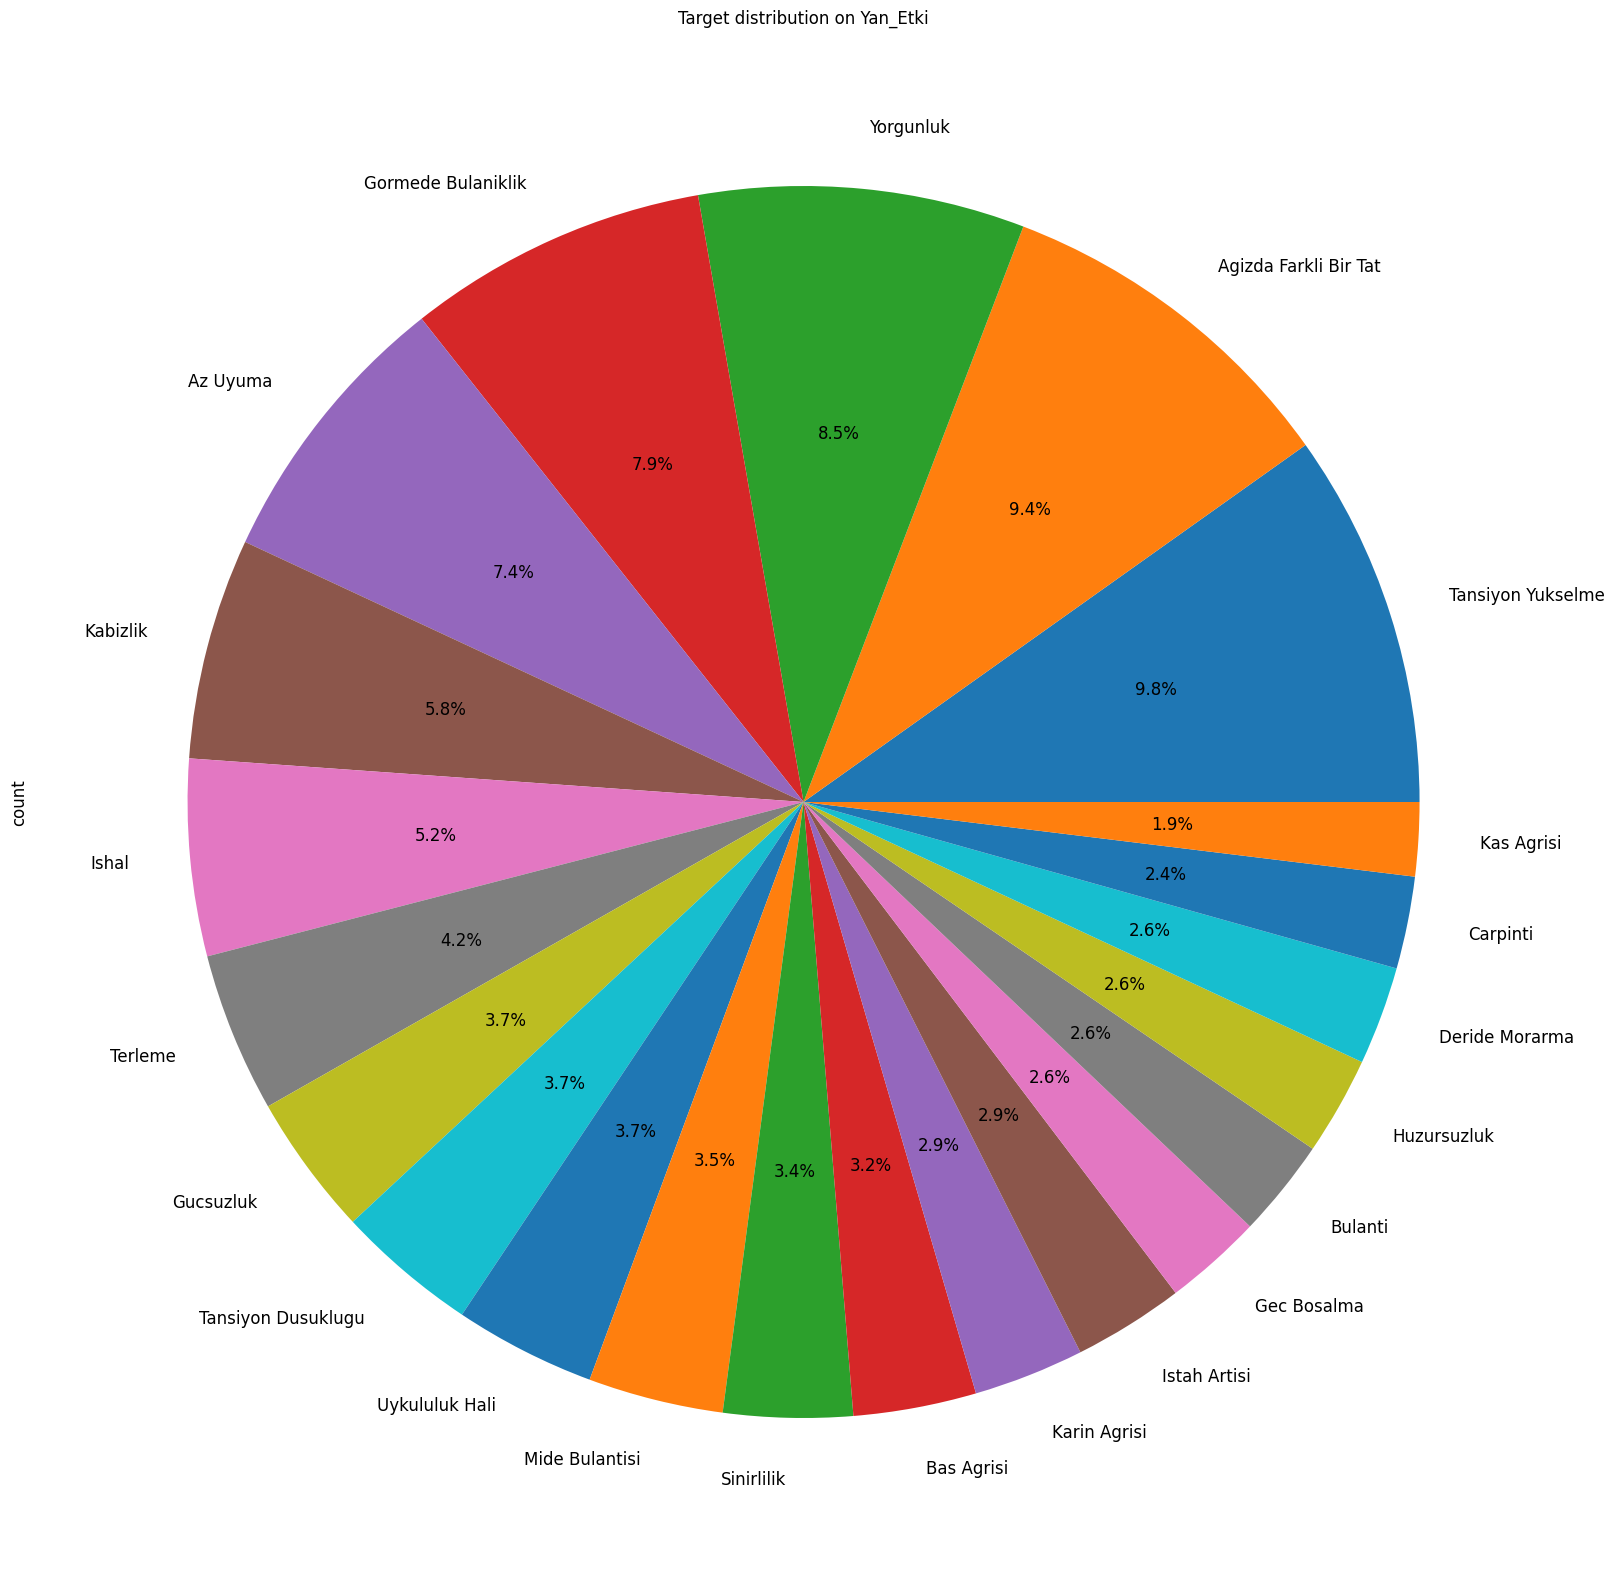

In [74]:
# Figure size
sns.set_context('poster', font_scale=0.5)
plt.figure(figsize=(20,20))
# Pie plot
df['Yan_Etki'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':12}).set_title("Target distribution on Yan_Etki")

***Data Pre-Processing***

Filling some missing values with Unknown

In [134]:
df['Il'] = df['Il'].fillna(value='Unknown') #  Changing the NaN values to unknown
df['Kilo'] = df['Kilo'].fillna(value='Unknown')
df['Boy'] = df['Boy'].fillna(value='Unknown')

dropna() function deletes missing values from rows.

In [135]:
df.dropna(axis=0,inplace=True)

In [136]:
df['Cinsiyet'] = df['Cinsiyet'].map({'Female':1, 'Male':0})
df.head()

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik_Hastaliklarim,Baba_Kronik_Hastaliklari,Anne_Kronik_Hastaliklari,Kiz_Kardes_Kronik_Hastaliklari,Erkek_Kardes_Kronik_Hastaliklari,Kan_Grubu,Kilo,Boy
0,107,0,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0
2,2,1,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0
18,156,1,2007-06-13,Turkiye,Antalya,"selegiline patch, transdermal 24 hours",2022-01-05,2022-03-19,Istah Artisi,2022-02-17 07:08:01,Karaciger,"Kemik Erimesi, Alzheimer","Guatr, Kalp Hastaliklari",Kemik Erimesi,"Diyabet, Alzheimer","Kalp Hastaliklari, Alzheimer",AB RH-,80.0,171.0
19,113,0,2010-07-23,Turkiye,Trabzon,alprazolam,2022-01-12,2022-03-04,Terleme,2022-02-03 00:24:29,Kahve,"KOAH, Kalp Hastaliklari","Astim, Guatr","Guatr, Kan Hastaliklari","KOAH, Kan Hastaliklari","Kan Hastaliklari, KOAH",0 RH+,76.0,155.0
27,156,1,2007-06-13,Turkiye,Antalya,"selegiline patch, transdermal 24 hours",2022-01-06,2022-03-06,Gucsuzluk,2022-02-01 04:34:33,Karaciger,"Kemik Erimesi, Alzheimer","Guatr, Kalp Hastaliklari",Kemik Erimesi,"Diyabet, Alzheimer","Kalp Hastaliklari, Alzheimer",AB RH-,80.0,171.0


Using LabelEncoder we can turn categorical variables to numeric. We have already did 'Cinsiyet' column so this is not going to effect it. 'Kilo' and 'Boy' columns are numeric so we are not going to change those either.

In [139]:
le = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns

columns_to_exclude = ['Kilo', 'Boy']
categorical_columns = [col for col in categorical_columns if col not in columns_to_exclude]

for column in categorical_columns:
    df[column] = le.fit_transform(df[column].astype(str))

In [138]:
df

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik_Hastaliklarim,Baba_Kronik_Hastaliklari,Anne_Kronik_Hastaliklari,Kiz_Kardes_Kronik_Hastaliklari,Erkek_Kardes_Kronik_Hastaliklari,Kan_Grubu,Kilo,Boy
0,107,0,1960-03-01,0,4,135,2022-01-09,2022-03-04,12,2022-02-19 18:28:43,2,17,13,19,40,41,7,103.0,191.0
2,2,1,1976-12-17,0,4,143,2022-01-11,2022-03-12,4,2022-02-04 05:29:20,19,26,11,40,16,9,7,93.0,158.0
18,156,1,2007-06-13,0,2,129,2022-01-05,2022-03-19,11,2022-02-17 07:08:01,14,37,14,38,12,28,5,80.0,171.0
19,113,0,2010-07-23,0,12,3,2022-01-12,2022-03-04,19,2022-02-03 00:24:29,12,22,5,14,24,33,0,76.0,155.0
27,156,1,2007-06-13,0,2,129,2022-01-06,2022-03-06,8,2022-02-01 04:34:33,14,37,14,38,12,28,5,80.0,171.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332,126,1,1992-03-26,0,1,24,2022-01-02,2022-03-14,2,2022-02-19 04:14:26,5,13,41,1,2,30,7,55.0,176.0
2337,113,0,2010-07-23,0,12,120,2022-01-11,2022-03-14,17,2022-02-14 03:35:01,12,22,5,14,24,33,0,76.0,155.0
2344,62,0,2001-05-09,0,11,2,2022-01-09,2022-03-07,10,2022-02-19 21:47:39,3,36,34,31,32,13,7,88.0,182.0
2347,148,0,1981-08-31,0,3,79,2022-01-01,2022-03-16,21,2022-02-03 20:48:17,8,39,8,0,1,30,0,94.0,Unknown
